# Chapter 9 - Plotting and Visualization

## 9.1 A Brief mapplotlit API Primer

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

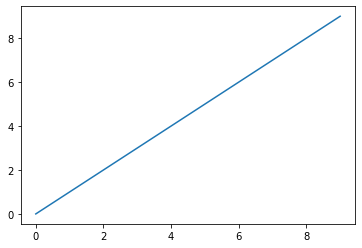

In [2]:
data = np.arange(10)
plt.plot(data)

### Figures and Subplots

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [4]:
ax1 = fig.add_subplot(2, 2, 1)

In [5]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
# nothing will show as there is no data to plot
# this is the case with Jupyter, not with IPython

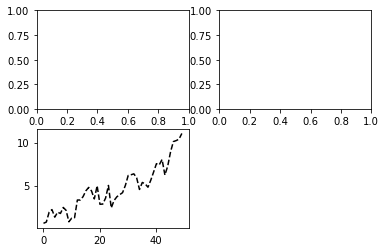

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(),'k--')

In [7]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

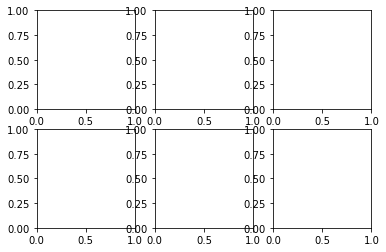

In [8]:
fig, axes = plt.subplots(2, 3)
axes

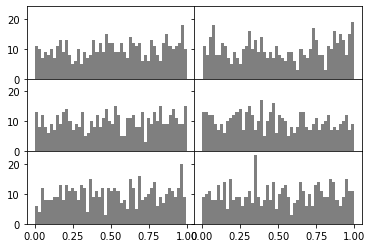

In [9]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)

for i in range(3):
    for j in range(2):
        axes[i, j].hist(np.random.rand(500), bins=50, color='k', alpha=0.5)
    plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers and Line Styles

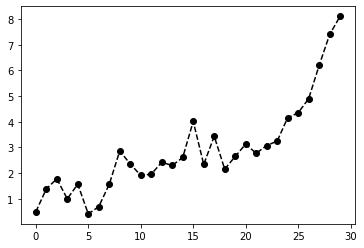

In [10]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

In [11]:
data = np.random.randn(30).cumsum()

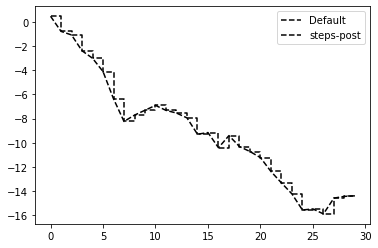

In [12]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

#### Ticks, Labels, and Legends
##### Setting the title, axis labels, ticklabel

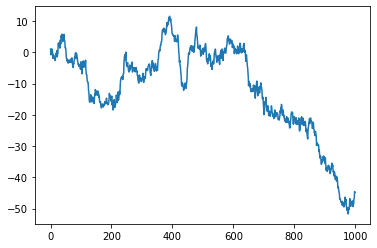

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 0, 'Stages')

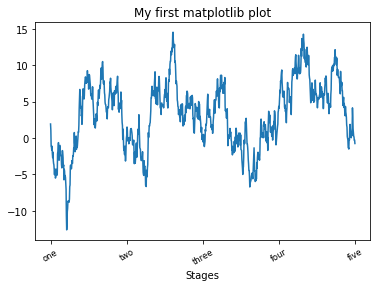

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')

ax.set_xlabel('Stages')

#### Adding legends

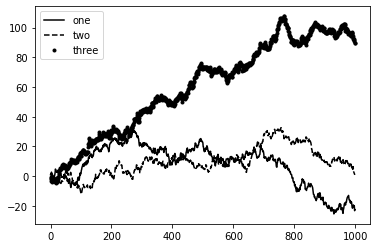

In [15]:
from numpy.random import randn

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

#### Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

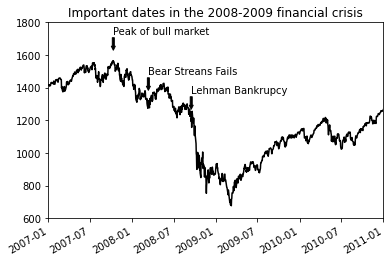

In [16]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('./examples/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Streans Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankrupcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                               headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

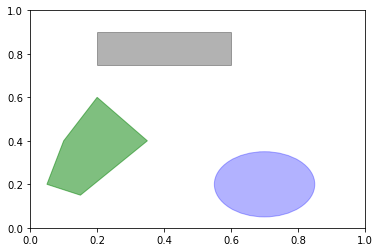

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6], [0.1, 0.4], [0.05, 0.2]],
                  color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

In [18]:
# you can save plots to file

## 9.2 Plotting with pandas and seaborn

<AxesSubplot:>

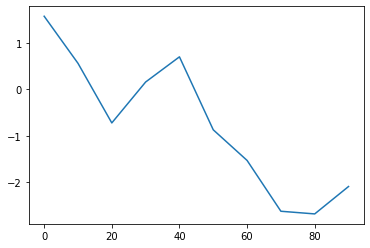

In [19]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

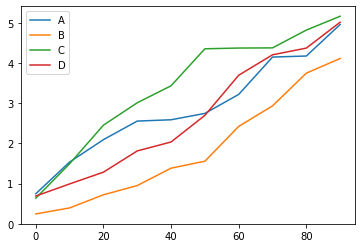

In [20]:
df = pd.DataFrame(np.random.rand(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

In [21]:
#! Bar Plots

<AxesSubplot:>

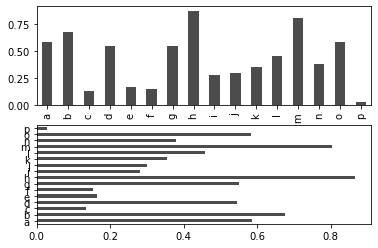

In [22]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)

data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [23]:
df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.912841,0.758570,0.199388,0.189142
two,0.020844,0.108828,0.822376,0.707312
three,0.313206,0.823050,0.562050,0.286397
four,0.700728,0.059794,0.987782,0.879817
five,0.183426,0.550216,0.376603,0.460651
six,0.585660,0.193400,0.618973,0.968997


<AxesSubplot:>

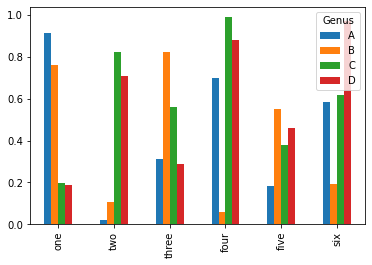

In [24]:
df.plot.bar()

<AxesSubplot:>

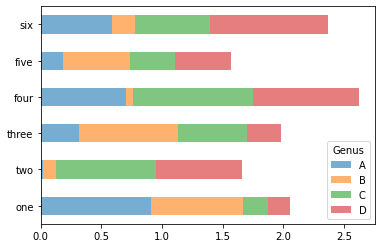

In [25]:
df.plot.barh(stacked=True, alpha=0.6)

In [26]:
tips = pd.read_csv('examples/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [27]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [28]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [29]:
party_counts = party_counts.loc[:, 2:5] # reduce 1- 6- person parties
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

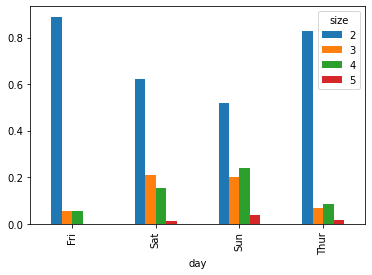

In [30]:
party_pcts.plot.bar()

In [31]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

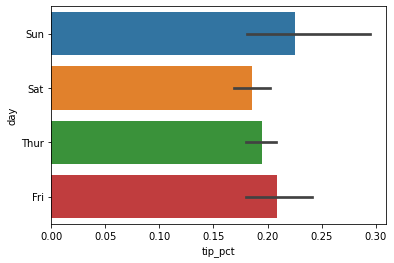

In [32]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

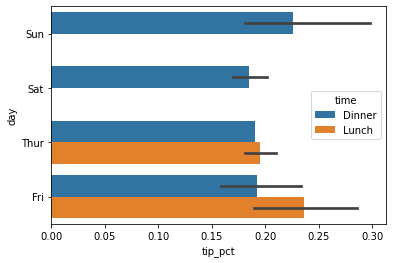

In [33]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [34]:
sns.set(style='whitegrid')

<AxesSubplot:ylabel='Frequency'>

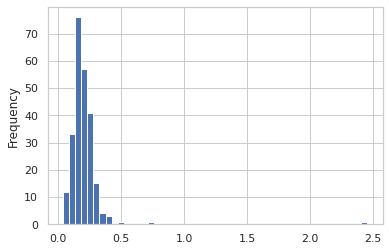

In [35]:
tips['tip_pct'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

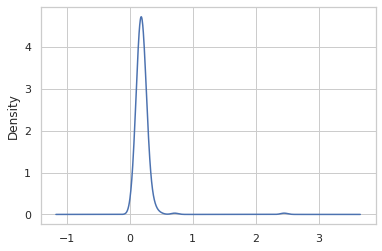

In [36]:
tips['tip_pct'].plot.density()

/home/shivan/miniconda3/envs/shivan_env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

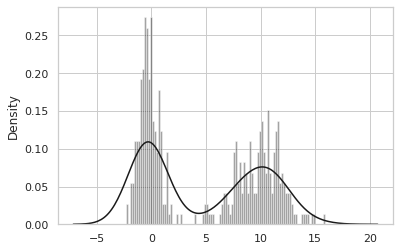

In [42]:
comp1 = np.random.normal(0, 1, size=200)

comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

In [43]:
# Scatter or Point Plots

In [45]:
macro = pd.read_csv('examples/examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()

trans_data[-10:]

,cpi,m1,tbilrate,unemp
193,0.006863,-0.007055,-0.047579,0.000000
194,0.008620,0.006693,-0.165514,0.043485
195,0.015948,-0.001306,-0.284354,0.021053
196,0.007044,0.004780,-0.657254,0.020619
197,0.021327,0.018115,0.109199,0.097164
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


/home/shivan/miniconda3/envs/shivan_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='m1', ylabel='unemp'>

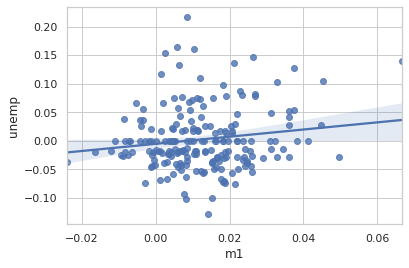

In [47]:
sns.regplot('m1', 'unemp', data=trans_data)

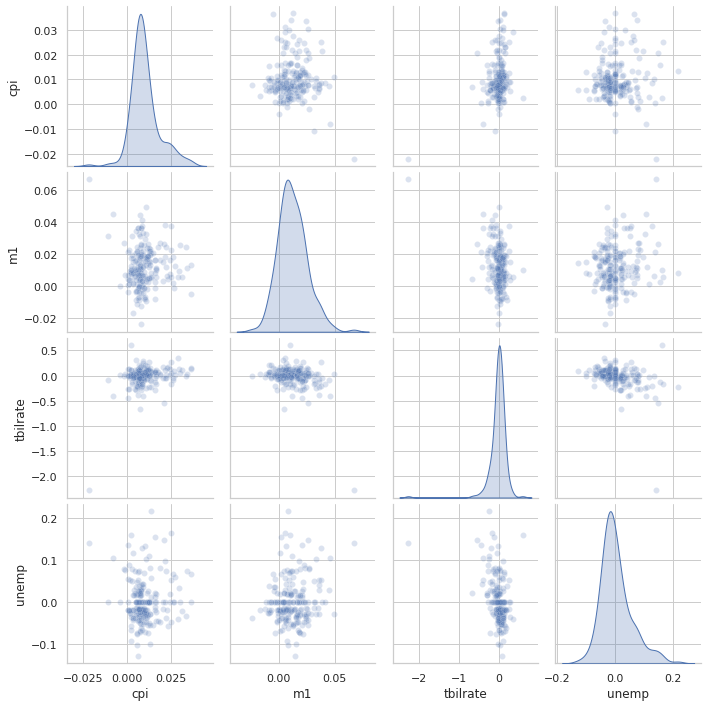

In [48]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

In [49]:
# Facet Grids and Categorical Data

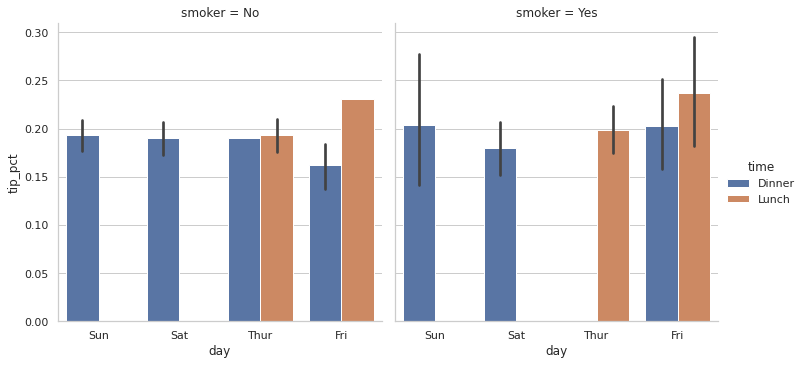

In [51]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

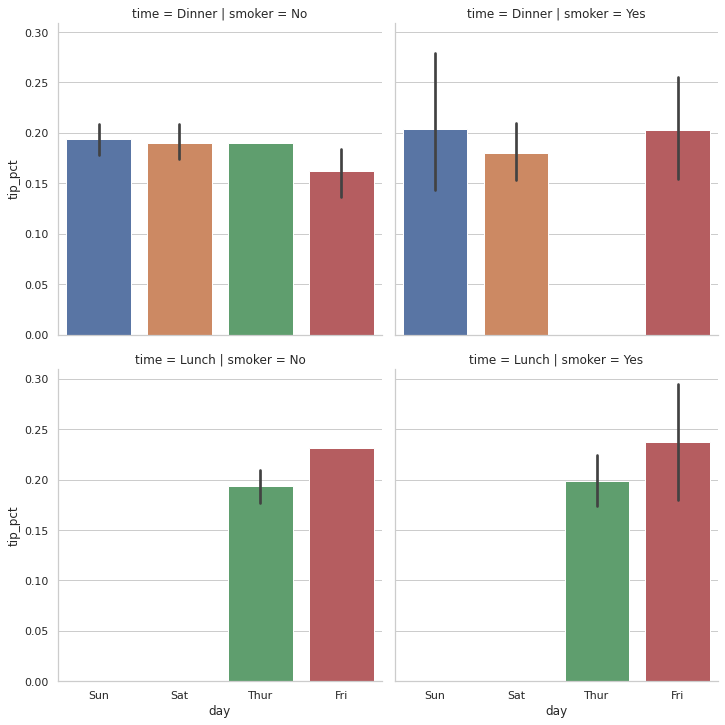

In [52]:
sns.catplot(x='day', y='tip_pct', row='time',
           col='smoker',
           kind='bar', data=tips[tips.tip_pct < 1])

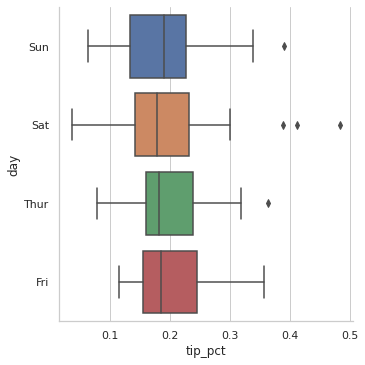

In [53]:
sns.catplot(x='tip_pct', y='day', kind='box',
           data=tips[tips.tip_pct < 0.5])

## 9.3 Other Python Visualization Tools

consider using `plotly` or `bokeh`.